In [0]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

torch.manual_seed(1)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Code adapted from https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379

In [0]:
class CustomMSELoss(torch.nn.Module):
    '''
    Like common MSELoss from pytorch, but return full tensor instead of
    sum or mean 
    '''
    def __init__(self):
        super().__init__()

    def forward(self, preds, targets):
        return (preds - targets) ** 2


# simple net for regression
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [0]:
# set important parameters
HIDDEN_SIZE = 50
TRAIN_SIZE = 100
EPOCHS = 200

In [0]:
def train_net(net, loss_func, optimizer, device, x, y):
    x = x.to(device)
    y = y.to(device)
    net = net.to(device)
    losses = []
    for t in range(EPOCHS):
        prediction = net(x)     # input x and predict based on x
        loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()
        # item for MSELoss, for CustomMSELoss one should use torch.sum(loss).cpu().item()
        losses.append(loss.cpu().item())
    return losses

In [0]:
# How to use:
# Choose optimizer with parameters, and create a new optimizer object
# Create new net object to train it from start, and run train_net function -
# this function return losses on train

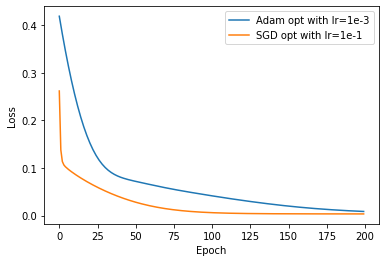

In [20]:
x = torch.unsqueeze(torch.linspace(-1, 1, TRAIN_SIZE), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

net = Net(n_feature=1, n_hidden=HIDDEN_SIZE, n_output=1)
optimizer = torch.optim.Adam(net.parameters())
losses = train_net(net, loss_func, optimizer, device, x, y)

net = Net(n_feature=1, n_hidden=HIDDEN_SIZE, n_output=1)
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
losses_sgd = train_net(net, loss_func, optimizer, device, x, y)

plt.plot(losses, label='Adam opt with lr=1e-3')
plt.plot(losses_sgd, label='SGD opt with lr=1e-1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()